**Preprocesamiento Dataset Coursera**

1) Importar Librerias Necesarias

In [ ]:
#!python -m spacy download es_core_news_sm
#!pip install unicode
!pip install fasttext

%matplotlib inline
from matplotlib import pyplot as plt
import csv
import warnings
import lxml.html.clean
warnings.filterwarnings('ignore')
import re
from re import sub
import multiprocessing
from textblob import TextBlob
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk import FreqDist
from bs4 import BeautifulSoup
import re, string, unicodedata
import spacy
from sklearn.metrics import accuracy_score

from nltk.tokenize.toktok import ToktokTokenizer
import collections

from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')

nltk.download('stopwords') 
stop_words =stopwords.words('spanish')

     |████████████████████████████████| 68 kB 4.1 MB/s 
  Using cached pybind11-2.9.1-py2.py3-none-any.whl (211 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3131747 sha256=3ac97f6444d06131488721fa5db8dfc3264fd96c5b145da9234e42354d44f99a
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2) Importar los datos csv en en un dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


#train_data=pd.read_csv('/content/gdrive/My Drive/TFM_Analisis_Sentimientos/Corpus/coursera_dataset.csv', delimiter='|', encoding='utf-8',engine='python',header=None,names=header_list,error_bad_lines=False )
train_data=pd.read_csv('/content/gdrive/My Drive/TFM_Analisis_Sentimientos/Corpus/Coursera_reviews.csv', encoding='utf-8',engine='python',error_bad_lines=False)



Mounted at /content/gdrive/


3) Análisis preeliminar de datos

In [ ]:
#Explorar 5 primeras filas
train_data.head(5)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that. As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken. Never found the suplimental material that the course references... but who cares... i passed!",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and screen shots would sho on the side of the text that the instructor is going thru so that user does not have to go all the way to beginning of text to be able to view any slides instructor is showing.,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself was a little annoying. I had to wait 30 to 45 minutes after watching the videos to to take the quiz. Other than that the information was perfect and passed the test with no issues!,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do a double take but all in all not bad.,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was very detailed and easy to follow.,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [ ]:
#Explorar 5 ultimas filas
train_data.tail(5)

,reviews,reviewers,date_reviews,rating,course_id
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking
1454710,G,By Reza S,"Aug 12, 2018",5,computer-networking


In [ ]:
#Revisar los tipos de datos
train_data.dtypes
#Eliminar columnas que no aportan información
train_data = train_data.drop(['reviewers', 'date_reviews', 'course_id'], axis=1)

In [ ]:
#Análisis de datos
# Número total de filas y columnas
print(f"*****El dataset contiene:{train_data.shape[0]} filas y {train_data.shape[1]} columnas *****")
#Filas que tienen datos duplicados
duplicate_rows_td = train_data[train_data.duplicated()]
print("*****Filas duplicadas", duplicate_rows_td.shape[0])
#Número de filas antes de eliminar duplicados
print(f"*****Número de filas antes de eliminar duplicados ***** \n{train_data.count()}", "\n")
#Eliminar duplicados
train_data = train_data.drop_duplicates()
#Número de filas antes de eliminar duplicados
print(f"*****Número de filas después de eliminar duplicados ***** \n{train_data.count()}", "\n")
print(f"*****Datos nulos en alguna columna ***** \n{train_data.isnull().sum()}", "\n")
#Eliminar Nulos
train_data = train_data.dropna() 
print(f"*****Luego de eliminar nulos ***** \n{train_data.count()}", "\n")
#Filtrar solo aquellos que tienen texto >5 caracteres
train_data = train_data[(train_data['reviews'].apply(len) >10)]


*****El dataset contiene:1454711 filas y 2 columnas *****
*****Filas duplicadas 993564
*****Número de filas antes de eliminar duplicados ***** 
reviews    1454571
rating     1454711
dtype: int64 

*****Número de filas después de eliminar duplicados ***** 
reviews    461142
rating     461147
dtype: int64 

*****Datos nulos en alguna columna ***** 
reviews    5
rating     0
dtype: int64 

*****Luego de eliminar nulos ***** 
reviews    461142
rating     461142
dtype: int64 



In [ ]:
train_data.head()

,reviews,rating
0,"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that. As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken. Never found the suplimental material that the course references... but who cares... i passed!",4
1,would be a better experience if the video and screen shots would sho on the side of the text that the instructor is going thru so that user does not have to go all the way to beginning of text to be able to view any slides instructor is showing.,4
2,Information was perfect! The program itself was a little annoying. I had to wait 30 to 45 minutes after watching the videos to to take the quiz. Other than that the information was perfect and passed the test with no issues!,4
3,A few grammatical mistakes on test made me do a double take but all in all not bad.,4
4,Excellent course and the training provided was very detailed and easy to follow.,4


3) Funciones para limpiar texto

In [ ]:
#Funciones para limpiar el texto
#!pip install spacy
#!python -m spacy download es_core_news_sm
stemmer = SnowballStemmer("spanish")
import fasttext
path_to_pretrained_model = '/content/gdrive/My Drive/TFM_Analisis_Sentimientos/Corpus/lid.176.bin'
fmodel = fasttext.load_model(path_to_pretrained_model)
stop_words.extend(['si', 'tambien', 'asi', 'debe', 'tener','cada','ademas','parte','ser','ma','mismo','mas'])  

#Funcion para remover tags html
def html_remover(data):
  beauti = BeautifulSoup(data,'html.parser')
  return beauti.get_text()

#Funcion para Remover URLs
def url_remover(data):
  return re.sub(r'https\S','',data)

def clean_text(text):
  #Convertir a minúsculas
  text = text.lower()
  #LLamar funciones para remover html y urls
  text= html_remover(text)
  text = url_remover(text) 
  #Eliminar texto entre corchetes, signos de puntuacion y numeros
  text = re.sub('\[.*?¿\]\%', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[‘’“”…«»]', '', text)
  text = re.sub('\n','', text)
  

  #Eliminar tildes y diacriticas
  text = re.sub('á', 'a', text)
  text = re.sub('é', 'e', text)
  text = re.sub('í', 'i', text)
  text = re.sub('ó', 'o', text)
  text = re.sub('ú', 'u', text)
  text = re.sub('ü', 'u', text)
  text = re.sub('ñ', 'n', text)
  text = re.sub('¿', '', text)

  return text

def tokenize_text(text):
  text = word_tokenize(text) 
  text = [word for word in text if word not in stop_words]
  return text

def lang_detect(text):
  languages = ["spanish","english","dutch","german","italian","portuguese","turkish","danish","french"]
  lang_count = {}
  tokens = nltk.tokenize.word_tokenize(text)
  tokens = [t.strip().lower() for t in tokens]
  for lang in languages:
    stop_words_l = str(nltk.corpus.stopwords.words(lang))
    lang_count[lang] = 0
    for word in tokens:
      if word in stop_words_l:
        lang_count[lang] += 1
  detected_language = max(lang_count, key=lang_count.get)
  return detected_language

def lang_detect_2(text):
  nlp = spacy.load('en')  # 1
  nlp.add_pipe(LanguageDetector(), name='language_detector', last=True) #2
  doc = nlp(text) #3
  detect_language = doc._.language #4
  return(detect_language)

def lang_detect_3(text):
  lang=fmodel.predict(text)  # ([['__label__en']], [array([0.9331119], dtype=float32)]
  return lang[0][0].replace('__label__', '')

4) Ejecutar limpieza de texto y detección de idioma

In [ ]:
#Ejecutar limpieza de datos
train_data['cleaned'] = train_data['reviews'].apply(clean_text)

In [ ]:
#Explorar los datos una vez ejecutadas las funciones de limpieza
train_data.sample(10)

,reviews,rating,cleaned
1151281,"Excelente curso para introducirse en la programación con, muy explicativo y con todos los pasos a pasos necesarios para quien tiene nulo conocimiento en el lenguaje.",5,excelente curso para introducirse en la programacion con muy explicativo y con todos los pasos a pasos necesarios para quien tiene nulo conocimiento en el lenguaje
1366334,"It was for me the first exprience of taking a class online - and Prof. Andrew Ng set high standards. Not by providing ""super cool"" animations and using best-in-class visualizations, but with sticking to what is really important: understanding and teaching the mechanics behind machine learning as well as the math involved in it. This is what sparks the joy of learning new things - to get teached by someone who shares the same joy of sharing his/her knowledge. The hard work involved in setting up this class as well as the coursera platform is well acknowledged. Wish the entire team all the best for the future.Thank you!",5,it was for me the first exprience of taking a class online and prof andrew ng set high standards not by providing super cool animations and using bestinclass visualizations but with sticking to what is really important understanding and teaching the mechanics behind machine learning as well as the math involved in it this is what sparks the joy of learning new things to get teached by someone who shares the same joy of sharing hisher knowledge the hard work involved in setting up this class as well as the coursera platform is well acknowledged wish the entire team all the best for the futurethank you
925947,"Wonderful Course!Very helpful for managers, and future ones.",5,wonderful coursevery helpful for managers and future ones
319840,good to learn,5,good to learn
1432503,Great course to learn all the fundamental tools and skills necessary to succeed in an IT Support role.,5,great course to learn all the fundamental tools and skills necessary to succeed in an it support role
33604,"Great course to start with if you are new to programming. Dr. Charles Severance introduces programming in a unique way which was entirely different of how i was taught during my college. His emphasis are more dependent on how the system thinks rather how we think. Although, its just minor shift teaching ideology but this has huge psychological benefits.",5,great course to start with if you are new to programming dr charles severance introduces programming in a unique way which was entirely different of how i was taught during my college his emphasis are more dependent on how the system thinks rather how we think although its just minor shift teaching ideology but this has huge psychological benefits
949365,"A well designed, informative, course with an excellent teacher. One comment: when playing musical examples, it would have been helpful if the instructor's comments had been put in text on the screen rather than having the instructor talk over the music.",4,a well designed informative course with an excellent teacher one comment when playing musical examples it would have been helpful if the instructors comments had been put in text on the screen rather than having the instructor talk over the music
178243,"Great course for those who has no idea about what the project management is. Course materials are sufficient and professor is really great, she knows how to present information!",5,great course for those who has no idea about what the project management is course materials are sufficient and professor is really great she knows how to present information
403491,Great introduction to computational thinking and coding.,4,great introduction to computational thinking and coding
546219,"The course is smooth and exciting and the lecturers know what they are doing very well , I highly recommend this course for everybody interested in Data Science",5,the course is smooth and exciting and the lecturers know what they are doing very well i highly recommend this course 

In [ ]:
#Detectar idioma
train_data['lang'] = train_data['cleaned'].apply(lang_detect_3)

In [ ]:
train_data.sample(6)

,reviews,rating,cleaned,lang
452351,This was just amazing. We have learnt ipython and pandas with real life problems.,5,this was just amazing we have learnt ipython and pandas with real life problems,en
771745,Superb course material! Eventful learning experience! Thanks a lot Andrew!,5,superb course material eventful learning experience thanks a lot andrew,en
194902,"Love the simple approach, simple notes but effective pointers. Thank you!",5,love the simple approach simple notes but effective pointers thank you,en
396298,most valuable content Thank you much,4,most valuable content thank you much,en
574463,"To easy, but maybe im not the right target audience",4,to easy but maybe im not the right target audience,en
1105927,It's very helpful course for me.,5,its very helpful course for me,en


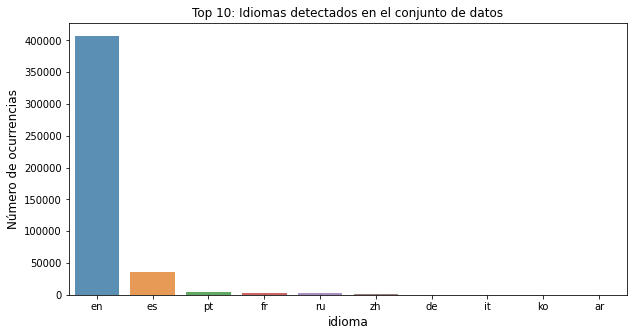

In [ ]:
#Agrupar datos por idioma

lang_count  = train_data["lang"].value_counts()
lang_count = lang_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(lang_count.index, lang_count.values, alpha=0.8)
plt.title('Top 10: Idiomas detectados en el conjunto de datos')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('idioma', fontsize=12)
plt.show()

5) Filtrar solo los de idioma español

In [ ]:
train_data = train_data[(train_data['lang'] == 'es')]
print(f"*****Cantidad de registros luego de filtrar el idioma ***** \n{train_data.count()}", "\n")

*****Cantidad de registros luego de filtrar el idioma ***** 
reviews    36513
rating     36513
cleaned    36513
lang       36513
dtype: int64 



6) Realizar segundo análisis sobre el texto en español

*****Nube de Palabras ***** 
 



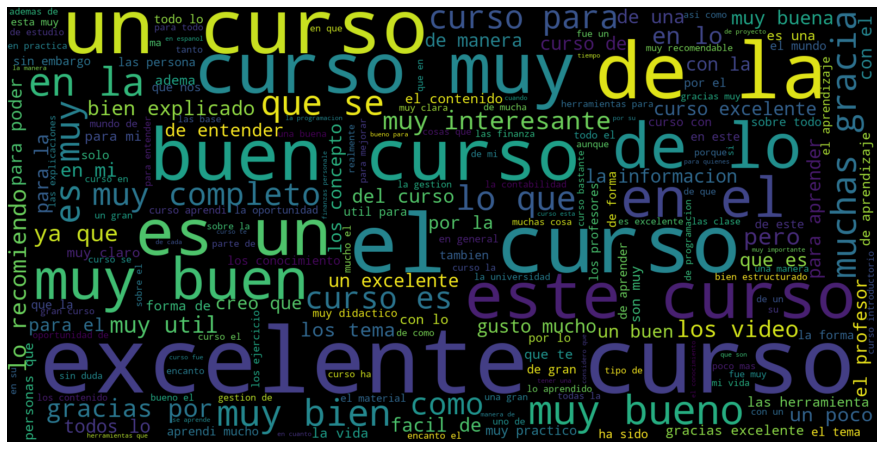

*****2000 palabras mas frecuentes ***** 
[('de', 35741), ('y', 30633), ('curso', 25800), ('que', 23467), ('muy', 22039), ('el', 18707), ('en', 18020), ('la', 17633), ('para', 15459), ('a', 14190), ('los', 12976), ('un', 12032), ('excelente', 11665), ('es', 11248), ('me', 11226), ('las', 8379), ('con', 7578), ('lo', 7492), ('se', 6027), ('no', 6012), ('una', 5780), ('por', 5680), ('gracias', 5435), ('mas', 5270), ('como', 4920), ('buen', 4832), ('este', 4770), ('mucho', 4279), ('del', 4072), ('bien', 3939), ('mi', 3467), ('al', 3273), ('bueno', 3151), ('muchas', 3089), ('pero', 3033), ('aprender', 2999), ('todo', 2655), ('son', 2487), ('completo', 2460), ('sobre', 2456), ('esta', 2396), ('te', 2270), ('interesante', 2211), ('herramientas', 2159), ('informacion', 2152), ('manera', 2054), ('conocimientos', 2019), ('ya', 1993), ('entender', 1963), ('temas', 1941), ('ha', 1914), ('aprendizaje', 1882), ('aprendi', 1874), ('gran', 1841), ('bastante', 1819), ('forma', 1809), ('util', 1786), ('

In [ ]:
#Unir el dataset limpio una sola cadena para realizar análisis
dataset = [x for x in train_data['cleaned']]
dataset = ' '.join(dataset)

#Imprimir nube de palabras
print(f"*****Nube de Palabras ***** \n", "\n")
wordcloud = WordCloud(
    background_color='black',
    width=1600, height=800).generate(dataset)
plt.figure( figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

tokenizer = ToktokTokenizer()
dataset_tokens = tokenizer.tokenize(dataset)

freq_splits = FreqDist(dataset_tokens)
print(f"*****2000 palabras mas frecuentes ***** \n{freq_splits.most_common(1000)}", "\n")

word_counts = collections.Counter(dataset_tokens)
print(print(f"***** Contador de Palabras ***** \n{word_counts}", "\n"))


Dividir en tokens y eliminar palabras vacías

*****Nube de Palabras ***** 
 



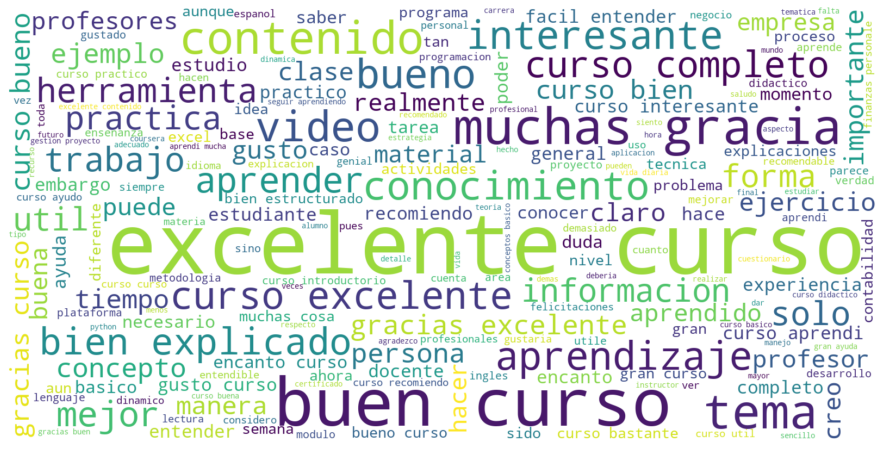

In [ ]:
#Dividir en palabras y eliminar palabras vacias
train_data['tokenized'] = train_data['cleaned'].apply(tokenize_text)

#Imprimir nube de palabras sin stop words
def to_doc(words:tuple) -> spacy.tokens.Doc:
    return ' '.join(words)

train_data['tokens_string'] = train_data['tokenized'].apply(to_doc)

dataset_stw = [x for x in train_data['tokens_string']]
dataset_stw = ' '.join(dataset_stw)

#Imprimir nube de palabras
print(f"*****Nube de Palabras ***** \n", "\n")
wordcloud = WordCloud(
    background_color='white',
    width=1600, height=800).generate(dataset_stw)
plt.figure( figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [ ]:
train_data.head()

,reviews,rating,cleaned,lang,tokenized,tokens_string
243,"Interesantísimo curso y muy bien planteado, quizás a veces muy extendido en cosas poco utilizadas en Finanzas y muy breve en cuestiones fundamentales. Schiller es muy bueno, me hubieran gustado más recomendaciones de lecturas de su parte.",3,interesantisimo curso y muy bien planteado quizas a veces muy extendido en cosas poco utilizadas en finanzas y muy breve en cuestiones fundamentales schiller es muy bueno me hubieran gustado mas recomendaciones de lecturas de su parte,es,"[interesantisimo, curso, bien, planteado, quizas, veces, extendido, cosas, utilizadas, finanzas, breve, cuestiones, fundamentales, schiller, bueno, gustado, recomendaciones, lecturas]",interesantisimo curso bien planteado quizas veces extendido cosas utilizadas finanzas breve cuestiones fundamentales schiller bueno gustado recomendaciones lecturas
281,Quisiera volver a realizar el curso.,3,quisiera volver a realizar el curso,es,"[quisiera, volver, realizar, curso]",quisiera volver realizar curso
434,"Me gusto mucho este curso. Solo falto traducir al castellano los cuestionarios de cada clase y tal vez subtitular los vídeos para hacerlos mas educativos y no tener que estar leyendo el texto como si estuviera apartado del vídeo. Por lo demás, un magnifico curso.",4,me gusto mucho este curso solo falto traducir al castellano los cuestionarios de cada clase y tal vez subtitular los videos para hacerlos mas educativos y no tener que estar leyendo el texto como si estuviera apartado del video por lo demas un magnifico curso,es,"[gusto, curso, solo, falto, traducir, castellano, cuestionarios, clase, tal, vez, subtitular, videos, hacerlos, educativos, leyendo, texto, apartado, video, demas, magnifico, curso]",gusto curso solo falto traducir castellano cuestionarios clase tal vez subtitular videos hacerlos educativos leyendo texto apartado video demas magnifico curso
567,"Me parece un muy buen curso, para principiantes y nos enseña de una manera clara, los conceptos básicos de los mercados financieros, así como todo lo que implica, me gusto mucho el curso.",4,me parece un muy buen curso para principiantes y nos ensena de una manera clara los conceptos basicos de los mercados financieros asi como todo lo que implica me gusto mucho el curso,es,"[parece, buen, curso, principiantes, ensena, manera, clara, conceptos, basicos, mercados, financieros, implica, gusto, curso]",parece buen curso principiantes ensena manera clara conceptos basicos mercados financieros implica gusto curso
569,"Me gustó el curso sin embargo siento que en unos temas iba muy rápido o no se explicaba con claridad, me hubiera gustado tener clases un poco más dinámicas, con videos y más cálculos",4,me gusto el curso sin embargo siento que en unos temas iba muy rapido o no se explicaba con claridad me hubiera gustado tener clases un poco mas dinamicas con videos y mas calculos,es,"[gusto, curso, embargo, siento, temas, iba, rapido, explicaba, claridad, gustado, clases, dinamicas, videos, calculos]",gusto curso embargo siento temas iba rapido explicaba claridad gustado clases dinamicas videos calculos


**Asignar columna de sentimiento **
En base al rating 1 y 2 se asigna polaridad NEGATIVA. Los comentarios con calificación 4 y 5 se asigna polaridad POSITIVA y para calificación 3 polaridad NEUTRAL

In [ ]:
#1 y 2 se asigna polaridad NEGATIVA. Los comentarios con calificación 4 y 5 se asigna polaridad POSITIVA y para calificación 3 polaridad NEUTRAL
def sentiment_label(rating):
  if(rating ==1  or rating ==2):
    sentiment='NEGATIVO'
  if(rating ==4  or rating ==5):
    sentiment='POSITIVO'
  if(rating ==3):
    sentiment='NEUTRAL'
  return sentiment

def source_data(row):
  return 'COURSERA'

train_data['sentiment'] = train_data['rating'].apply(sentiment_label)
train_data['source'] = train_data.apply(source_data,axis=1)

In [ ]:
sample_df = train_data.groupby("sentiment").sample(n=10, random_state=1)

In [ ]:
sample_df.head()

,reviews,rating,cleaned,lang,tokenized,tokens_string,sentiment,source
689977,"El manejo del tema y sus expositores denotan falta de preparación, lastimosamente este tema tan interesante fue desaprovechado por quienes lo dictan",1,el manejo del tema y sus expositores denotan falta de preparacion lastimosamente este tema tan interesante fue desaprovechado por quienes lo dictan,es,"[manejo, tema, expositores, denotan, falta, preparacion, lastimosamente, tema, tan, interesante, desaprovechado, dictan]",manejo tema expositores denotan falta preparacion lastimosamente tema tan interesante desaprovechado dictan,NEGATIVO,COURSERA
743297,"SEÑORES. YO NO HE AUTORIZADO QUE ME INSCRIBAN EN ESTE CURSO, NO SEAN ABUSIVOS . DEVUELVANME MI DINERO,",1,senores yo no he autorizado que me inscriban en este curso no sean abusivos devuelvanme mi dinero,es,"[senores, autorizado, inscriban, curso, abusivos, devuelvanme, dinero]",senores autorizado inscriban curso abusivos devuelvanme dinero,NEGATIVO,COURSERA
1047309,"Todo está perfecto. Excepto mi certificado. Quién lo firma? es una burla? pone ""signature"", por qué no o firma nadie del MOMA? por qué nisiquiera lo firma uno de los profesores? es un curso real del MOMA? quiero saber quién firmó mi certificado y exio sea corregido y sea real. Yo hice mi curso con consciencia y dedique tiempo y pagué mi certificado. quiero respuestas. Gracias",1,todo esta perfecto excepto mi certificado quien lo firma es una burla pone signature por que no o firma nadie del moma por que nisiquiera lo firma uno de los profesores es un curso real del moma quiero saber quien firmo mi certificado y exio sea corregido y sea real yo hice mi curso con consciencia y dedique tiempo y pague mi certificado quiero respuestas gracias,es,"[perfecto, excepto, certificado, firma, burla, pone, signature, firma, nadie, moma, nisiquiera, firma, profesores, curso, real, moma, quiero, saber, firmo, certificado, exio, corregido, real, hice, curso, consciencia, dedique, tiempo, pague, certificado, quiero, respuestas, gracias]",perfecto excepto certificado firma burla pone signature firma nadie moma nisiquiera firma profesores curso real moma quiero saber firmo certificado exio corregido real hice curso consciencia dedique tiempo pague certificado quiero respuestas gracias,NEGATIVO,COURSERA
1058192,Es un curso débil y con varios errores técnicos y conceptuales. No me gustó.,1,es un curso debil y con varios errores tecnicos y conceptuales no me gusto,es,"[curso, debil, varios, errores, tecnicos, conceptuales, gusto]",curso debil varios errores tecnicos conceptuales gusto,NEGATIVO,COURSERA
875805,Quiero darme de baja a este curso por favor,1,quiero darme de baja a este curso por favor,es,"[quiero, darme, baja, curso, favor]",quiero darme baja curso favor,NEGATIVO,COURSERA


In [ ]:
train_data.sample(5)
df=train_data

,reviews,rating,cleaned,lang,tokenized,tokens_string,sentiment,source
336431,La mejor enseñanza.,5,la mejor ensenanza,es,"[mejor, ensenanza]",mejor ensenanza,POSITIVO,COURSERA
1150894,"Fue muy interesante conocer el potencial del programa R, adicional complementado con el programa Rstudio y aprender paso a paso mediante la práctica tanto la interfaz como el lenguaje básico de programar en R.",5,fue muy interesante conocer el potencial del programa r adicional complementado con el programa rstudio y aprender paso a paso mediante la practica tanto la interfaz como el lenguaje basico de programar en r,es,"[interesante, conocer, potencial, programa, r, adicional, complementado, programa, rstudio, aprender, paso, paso, mediante, practica, interfaz, lenguaje, basico, programar, r]",interesante conocer potencial programa r adicional complementado programa rstudio aprender paso paso mediante practica interfaz lenguaje basico programar r,POSITIVO,COURSERA
764289,"El curso es muy útil para quienes deseen comenzar a entender con mayor claridad los conceptos de la transformación digital, pero su mayor valor es por sobre todo su aproximación desde los modelos de negocio. El curso no centra su atención en las tecnologías, sino que en las implicancias de estas para un ejecutivo.",5,el curso es muy util para quienes deseen comenzar a entender con mayor claridad los conceptos de la transformacion digital pero su mayor valor es por sobre todo su aproximacion desde los modelos de negocio el curso no centra su atencion en las tecnologias sino que en las implicancias de estas para un ejecutivo,es,"[curso, util, deseen, comenzar, entender, mayor, claridad, conceptos, transformacion, digital, mayor, valor, aproximacion, modelos, negocio, curso, centra, atencion, tecnologias, sino, implicancias, ejecutivo]",curso util deseen comenzar entender mayor claridad conceptos transformacion digital mayor valor aproximacion modelos negocio curso centra atencion tecnologias sino implicancias ejecutivo,POSITIVO,COURSERA
690689,"Es un buen curso, didáctico que brinda información básica de Lean aplicada a los proyectos. No obstante creo que hay algunos aspectos a mejorar en algunas lecciones que se imparten.",4,es un buen curso didactico que brinda informacion basica de lean aplicada a los proyectos no obstante creo que hay algunos aspectos a mejorar en algunas lecciones que se imparten,es,"[buen, curso, didactico, brinda, informacion, basica, lean, aplicada, proyectos, obstante, creo, aspectos, mejorar, lecciones, imparten]",buen curso didactico brinda informacion basica lean aplicada proyectos obstante creo aspectos mejorar lecciones imparten,POSITIVO,COURSERA
1038074,"Excelente curso y material que proporciona, te ayuda a aplicarlo internamente en las compañías.",5,excelente curso y material que proporciona te ayuda a aplicarlo internamente en las companias,es,"[excelente, curso, material, proporciona, ayuda, aplicarlo, internamente, companias]",excelente curso material proporciona ayuda aplicarlo internamente companias,POSITIVO,COURSERA


POSITIVO    35182
NEUTRAL     832  
NEGATIVO    499  
Name: sentiment, dtype: int64


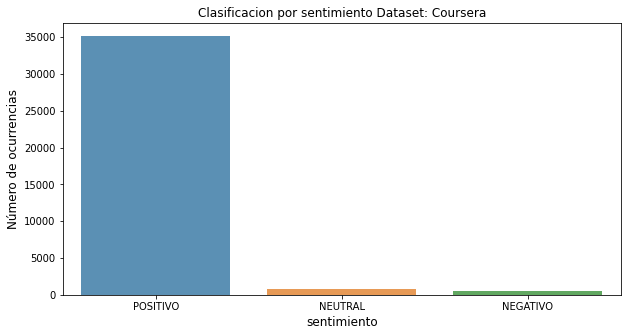

In [ ]:
#Analizar el dataset
#print(train_data["rating"].value_counts())
print(train_data["sentiment"].value_counts())
lang_count  = train_data["sentiment"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(lang_count.index, lang_count.values, alpha=0.8)
plt.title('Clasificacion por sentimiento Dataset: Coursera')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('sentimiento', fontsize=12)
plt.show()

In [ ]:
train_data.to_csv('dataset_2_coursera.csv',columns=['cleaned','sentiment','source'])